<a href="https://colab.research.google.com/github/Janu-2027/SCT_ML_2/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [12]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
features = ["Age","Annual Income (k$)","Spending Score (1-100)"]
X = df[features]


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


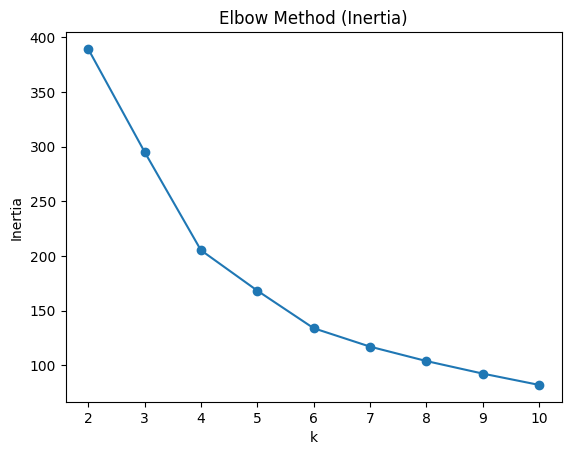

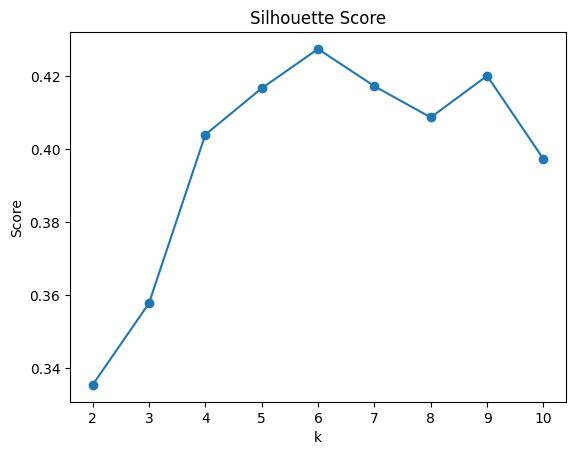

In [15]:
inertias, sils, ks = [], [], range(2,11)

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, labels))

plt.plot(list(ks), inertias, marker="o")
plt.title("Elbow Method (Inertia)")
plt.xlabel("k"); plt.ylabel("Inertia")
plt.show()

plt.plot(list(ks), sils, marker="o")
plt.title("Silhouette Score")
plt.xlabel("k"); plt.ylabel("Score")
plt.show()


In [16]:
best_k = 5  # change if you choose 4 or other
final_km = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = final_km.fit_predict(X_scaled)

df["Cluster"] = labels
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [17]:
profile = df.groupby("Cluster")[features].mean().round(2)
profile["Count"] = df["Cluster"].value_counts().sort_index().values
profile


,Age,Annual Income (k$),Spending Score (1-100),Count
Cluster,,,,
0,46.25,26.75,18.35,20
1,25.19,41.09,62.24,54
2,32.88,86.10,81.53,40
3,39.87,86.10,19.36,39
4,55.64,54.38,48.85,47


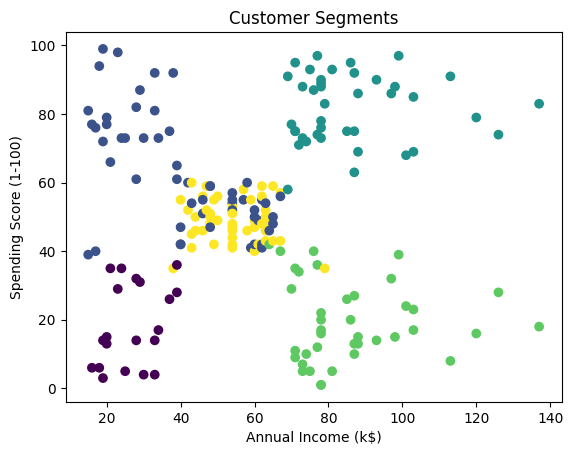

In [18]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=df["Cluster"], cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.show()


In [19]:
df.to_csv("customers_with_clusters.csv", index=False)
from google.colab import files
files.download("customers_with_clusters.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>